In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
DATA_PATH = '../data/'

plt.style.use('ggplot')
sns.set_palette('colorblind')

train_log_df = pd.read_csv(os.path.join(DATA_PATH, 'train_log.csv'))
test_log_df = pd.read_csv(os.path.join(DATA_PATH, 'test_log.csv'))
print("Metadata loaded successfully")

Metadata loaded successfully


In [3]:
# Initial Exploration of training data
print("\n--- Training Data ---")
print("Shape of training data:", train_log_df.shape)
print("First 5 rows:")
print(train_log_df.head())
print("\nData types and missing values:")
train_log_df.info()


--- Training Data ---
Shape of training data: (3043, 8)
First 5 rows:
                  object_id       Z  Z_err    EBV SpecType  \
0  Dornhoth_fervain_onodrim  3.0490    NaN  0.110      AGN   
1       Dornhoth_galadh_ylf  0.4324    NaN  0.058    SN II   
2      Elrim_melethril_thul  0.4673    NaN  0.577      AGN   
3        Ithil_tobas_rodwen  0.6946    NaN  0.012      AGN   
4       Mirion_adar_Druadan  0.4161    NaN  0.058      AGN   

                               English Translation     split  target  
0  Trawn Folk (Dwarfs) + northern + Ents (people)   split_01       0  
1    Trawn Folk (Dwarfs) + tree + drinking vessel   split_01       0  
2                  Elves +  lover (fem.)  + breath  split_01       0  
3                    moon +  roof  +  noble maiden  split_01       0  
4            jewel, Silmaril  + father + Wild Man   split_01       0  

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 8 co

In [4]:
# Target Variable Analysis
print("\n--- Target Variable Analysis ---")
target_counts = train_log_df['target'].value_counts()
target_percentage = train_log_df['target'].value_counts(normalize=True)*100

print("\nTarget Distribution")
print(target_counts)
print(f"\nPercentage of non-TDEs (0): {target_percentage[0]:.2f}%")
print(f"Percentage of TDEs (1): {target_percentage[1]:.2f}%")


--- Target Variable Analysis ---

Target Distribution
target
0    2895
1     148
Name: count, dtype: int64

Percentage of non-TDEs (0): 95.14%
Percentage of TDEs (1): 4.86%


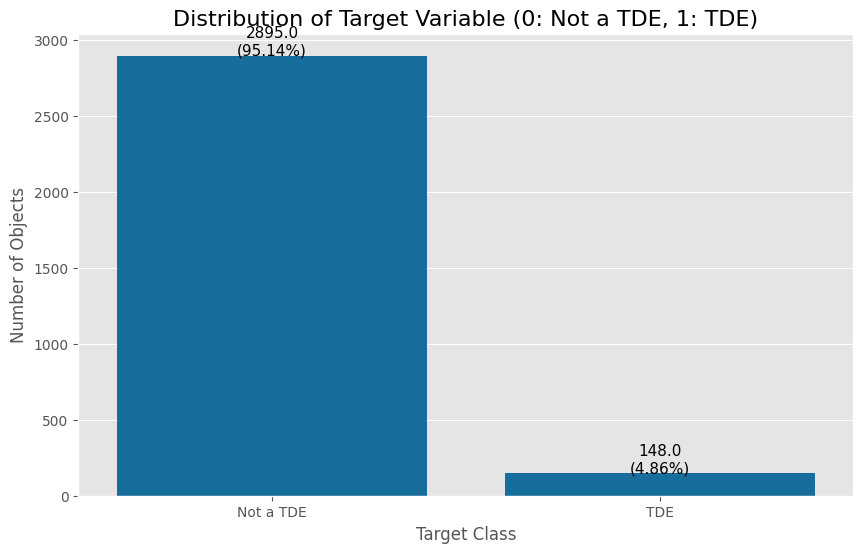

In [5]:
# Visualisation of targe distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='target', data=train_log_df)

plt.title('Distribution of Target Variable (0: Not a TDE, 1: TDE)', fontsize=16)
plt.xlabel('Target Class', fontsize=12)
plt.ylabel('Number of Objects', fontsize=12)
plt.xticks([0, 1], ['Not a TDE', 'TDE'])

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}\n({p.get_height() / len(train_log_df) * 100:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')

plt.show()

## Severe Class Imbalance  

The dataset is extremely imbalanced. 2,895 non TDEs and only 148 TDEs.

# EDA on metadata features

In [6]:
# Data CLeaning
if 'Z_err' in train_log_df.columns:
    train_log_df = train_log_df.drop(columns=['Z_err'])
    print("Dropped 'Z_err' column")

# Feature Exploration
print("Analysing feature distribution vs. target...")

# Define the two classes for easier plotting
tde_df = train_log_df[train_log_df['target'] == 1]
non_tde_df = train_log_df[train_log_df['target'] == 0]

Dropped 'Z_err' column
Analysing feature distribution vs. target...


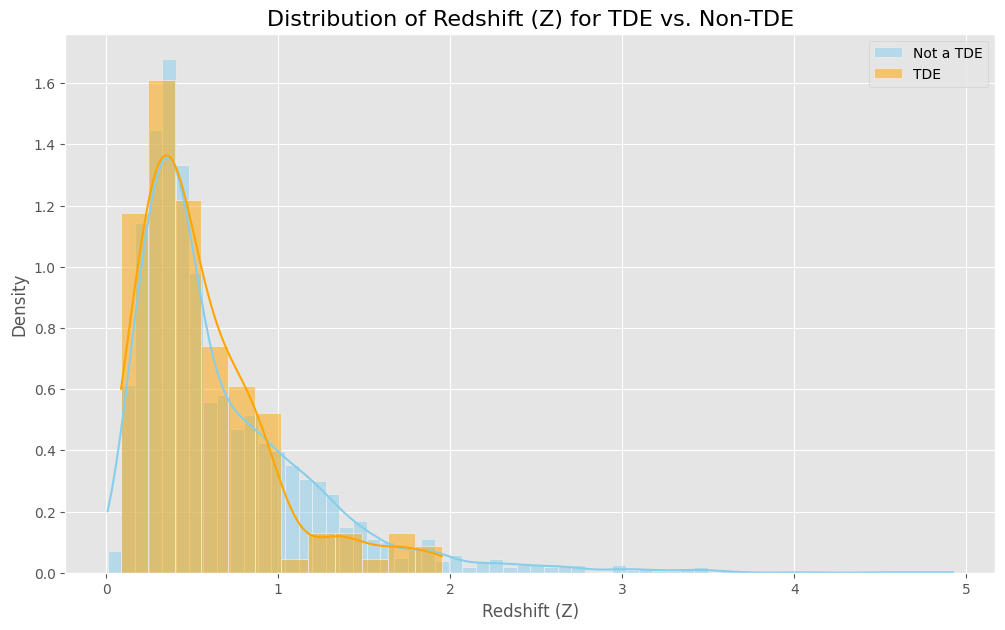

Bins: [0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0]
Non-TDE counts: [4, 31, 67, 173, 162, 208, 201, 253, 229, 171, 135, 104, 71, 83, 76, 67, 71, 78, 59, 57]
TDE counts: [0, 3, 3, 9, 12, 8, 18, 11, 11, 11, 6, 4, 8, 3, 4, 7, 5, 5, 4, 2]


In [9]:
# 1. Analyse Redshift (Z)
plt.figure(figsize=(12, 7))
sns.histplot(data=non_tde_df, x='Z', color='skyblue', label='Not a TDE', kde=True, stat='density', common_norm=False)
sns.histplot(data=tde_df, x='Z', color='orange', label='TDE', kde=True, stat='density', common_norm=False)
plt.title('Distribution of Redshift (Z) for TDE vs. Non-TDE', fontsize=16)
plt.xlabel('Redshift (Z)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

hist_non_tde, bins = np.histogram(non_tde_df['Z'], bins=20, range=(0, 1))
hist_tde, _ = np.histogram(tde_df['Z'], bins=bins)

print("Bins:", bins.tolist())
print("Non-TDE counts:", hist_non_tde.tolist())
print("TDE counts:", hist_tde.tolist())


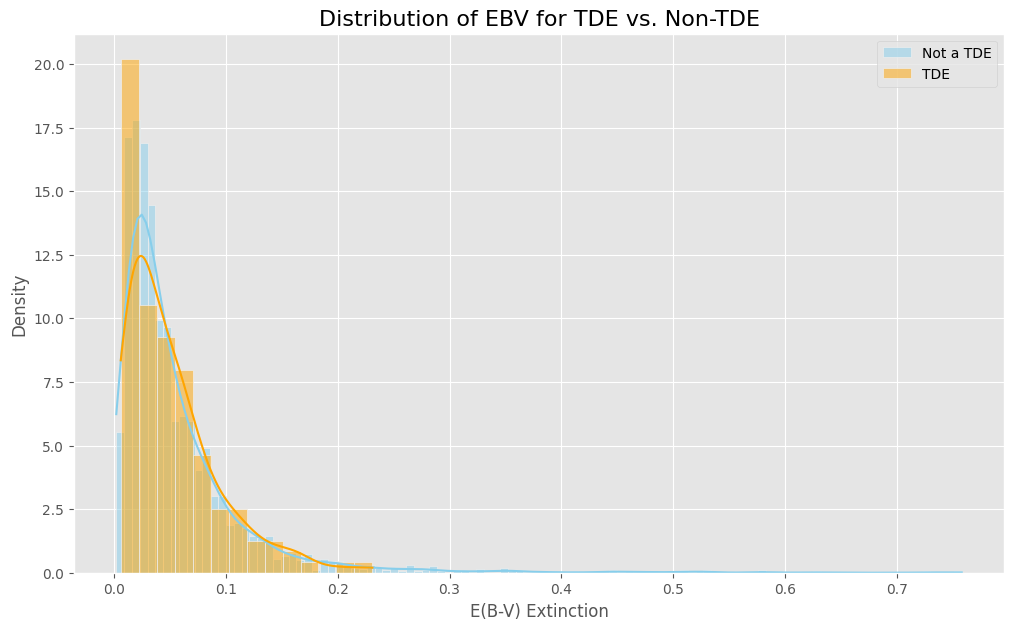

Bins: [0.0, 0.04, 0.08, 0.12, 0.16, 0.199, 0.239, 0.279, 0.319, 0.359, 0.399, 0.439, 0.479, 0.519, 0.559, 0.598, 0.638, 0.678, 0.718, 0.758]
Non-TDE counts: [1521, 798, 309, 129, 54, 30, 16, 9, 9, 3, 1, 5, 3, 3, 2, 1, 0, 0, 2]
TDE counts: [75, 45, 17, 6, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
{"EBV_distribution":{"Non-TDE":[1521,798,309,129,54,30,16,9,9,3,1,5,3,3,2,1,0,0,2],"TDE":[75,45,17,6,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0],"bins":[0.0,0.04,0.08,0.12,0.16,0.199,0.239,0.279,0.319,0.359,0.399,0.439,0.479,0.519,0.559,0.598,0.638,0.678,0.718,0.758]}}


In [ ]:
import json

# 2. Analyse Extinction (EBW)
plt.figure(figsize=(12, 7))
sns.histplot(data=non_tde_df, x='EBV', color='skyblue', label='Not a TDE', kde=True, stat='density', common_norm=False)
sns.histplot(data=tde_df, x='EBV', color='orange', label='TDE', kde=True, stat='density', common_norm=False)
plt.title('Distribution of EBV for TDE vs. Non-TDE', fontsize=16)
plt.xlabel('E(B-V) Extinction', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

# Create histogram bins
bins = np.linspace(0, max(non_tde_df['EBV'].max(), tde_df['EBV'].max()), 20)

hist_non_tde, _ = np.histogram(non_tde_df['EBV'], bins=bins)
hist_tde, _ = np.histogram(tde_df['EBV'], bins=bins)

bins_list = [round(float(b), 3) for b in bins]

# Print compact version
print("Bins:", bins_list)
print("Non-TDE counts:", hist_non_tde.tolist())
print("TDE counts:", hist_tde.tolist())

ebv_summary = {
    "EBV_distribution": {
        "Non-TDE": hist_non_tde.tolist(),
        "TDE": hist_tde.tolist(),
        "bins": bins_list
    }
}

print(json.dumps(ebv_summary, separators=(',', ':')))


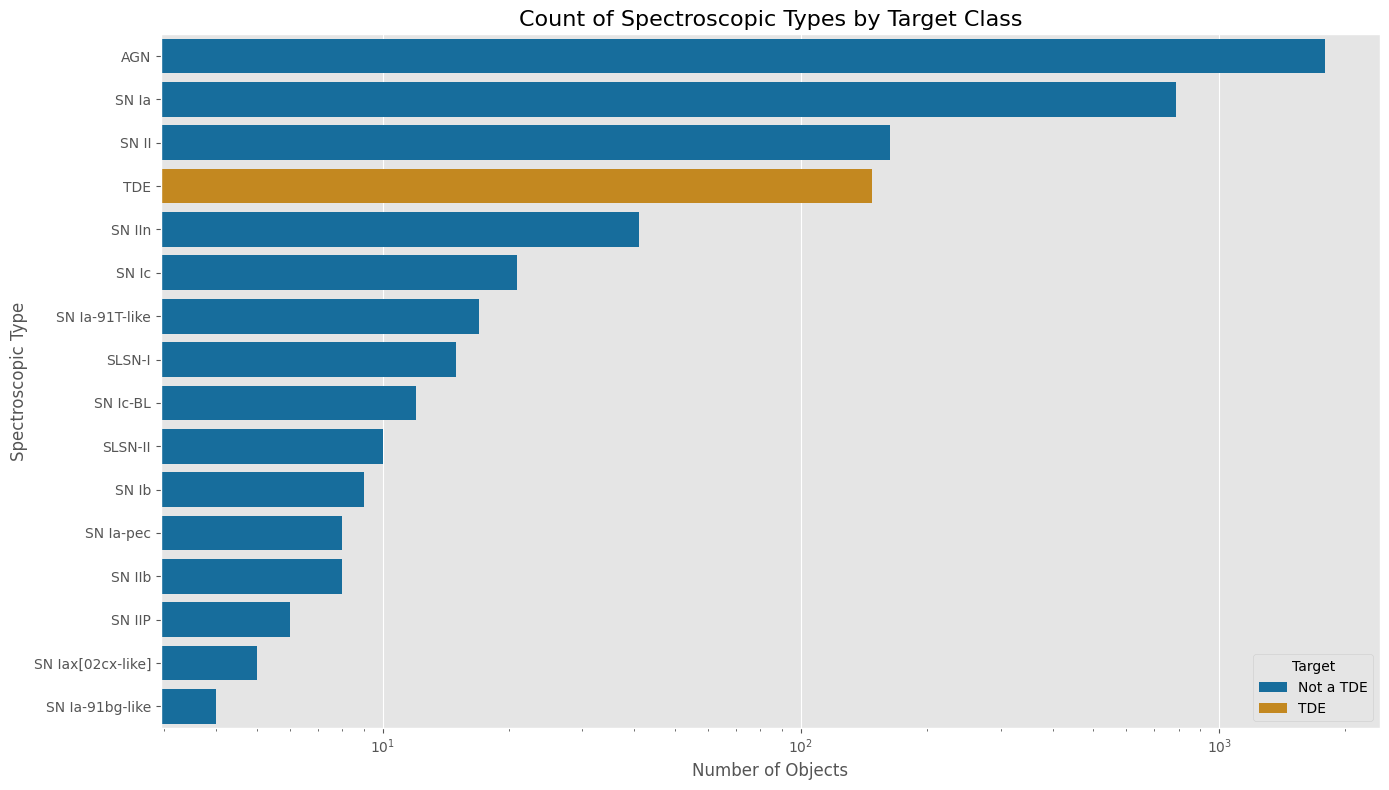

summary:
{"SpecType_distribution":{"AGN":{"0":1786,"1":0},"SN Ia":{"0":790,"1":0},"SN II":{"0":163,"1":0},"TDE":{"0":0,"1":148},"SN IIn":{"0":41,"1":0},"SN Ic":{"0":21,"1":0},"SN Ia-91T-like":{"0":17,"1":0},"SLSN-I":{"0":15,"1":0},"SN Ic-BL":{"0":12,"1":0},"SLSN-II":{"0":10,"1":0},"SN Ib":{"0":9,"1":0},"SN IIb":{"0":8,"1":0},"SN Ia-pec":{"0":8,"1":0},"SN IIP":{"0":6,"1":0},"SN Iax[02cx-like]":{"0":5,"1":0},"SN Ia-91bg-like":{"0":4,"1":0}}}


In [ ]:
# 3. Analyse Spectroscopic Type (SpecType)
plt.figure(figsize=(14, 8))
sns.countplot(y='SpecType', hue='target', data=train_log_df, order = train_log_df['SpecType'].value_counts().index)
plt.title('Count of Spectroscopic Types by Target Class', fontsize=16)
plt.xlabel('Number of Objects', fontsize=12)
plt.ylabel('Spectroscopic Type', fontsize=12)
plt.xscale('log')
plt.legend(title='Target', labels=['Not a TDE', 'TDE'])
plt.tight_layout()
plt.show()

spec_counts = train_log_df.groupby(['SpecType', 'target']).size().unstack(fill_value=0)

spec_counts['total'] = spec_counts.sum(axis=1)
spec_counts = spec_counts.sort_values('total', ascending=False).drop(columns='total')

spec_counts_dict = spec_counts.to_dict(orient='index')

print("summary:")
print(json.dumps({"SpecType_distribution": spec_counts_dict}, separators=(',', ':')))


## Analysis
The distribution for Z (Redshift) and EBV(Extinction) are very similar for both TDEs and non-TDEs. Both are heavily skewed towards lower values. While there might be subtle differences a model can pick up, neither of these features on their own appears to be a good feature for separating the classes.

The bar chart and the statistics show a perfect, one-to-one relationship in the training data:

* Every single row with target == 1 has SpecType == 'TDE'.
* Every single row with SpecType == 'TDE' has target == 1.

This is data leak. The SpecType is essentially a label that has been determined after the object was observed and classified. This feature is not available test set.

**Conclusion:** I cannot use the SpecType column as a feature to train our model. If I did, the model would learn to just check this column and would fail completely on the test data where this information is missing. This discovery clarifies the mission: 1. use the lightcurve data to predict the class, as if I didn't have the spectroscopic information.

## Plotting full lightcurve 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

DATA_PATH = '../data/'
train_log_df = pd.read_csv(os.path.join(DATA_PATH, 'train_log.csv'))
print("Training log loaded successfully.")

Training log loaded successfully.


In [22]:
dataframe_cache = {}
def load_lightcurve(object_id: str, split: str, is_train: bool = True) -> pd.DataFrame:
    """
    Loads the lightcurve data for a single object ID from the correct file.Uses a cache to avoid reading the same large CSV file multiple times.
    """
    file_type = "train" if is_train else "test"
    file_name = f"{file_type}_full_lightcurves.csv"
    file_path = os.path.join(DATA_PATH, split, file_name)

    if file_path not in dataframe_cache:
        try:
            full_df = pd.read_csv(file_path)
            dataframe_cache[file_path] = full_df
        except FileNotFoundError:
            print(f"ERROR: File not found at {file_path}")
            return pd.DataFrame()
    else:
        full_df = dataframe_cache[file_path]
    
    object_df = full_df[full_df['object_id'] == object_id].copy()
    return object_df

def plot_lightcurve(df: pd.DataFrame, title: str):
    """Plots the lightcurve for a given object's dataframe"""
    if df.empty:
        print(f"Cannot plot: DataFrame for '{title}' is empty")
        return
    plt.figure(figsize=(16, 8))
    sns.lineplot(
        data=df,
        x='Time (MJD)',
        y='Flux',
        hue='Filter',
        marker='o',
        linestyle='-'
    )
    plt.title(title, fontsize=18)
    plt.xlabel('Time (Modified Julian Date)', fontsize=14)
    plt.ylabel('Flux', fontsize=14)
    plt.legend(title='Filter', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Plotting a sample TDE: amon_imloth_luin from split_01


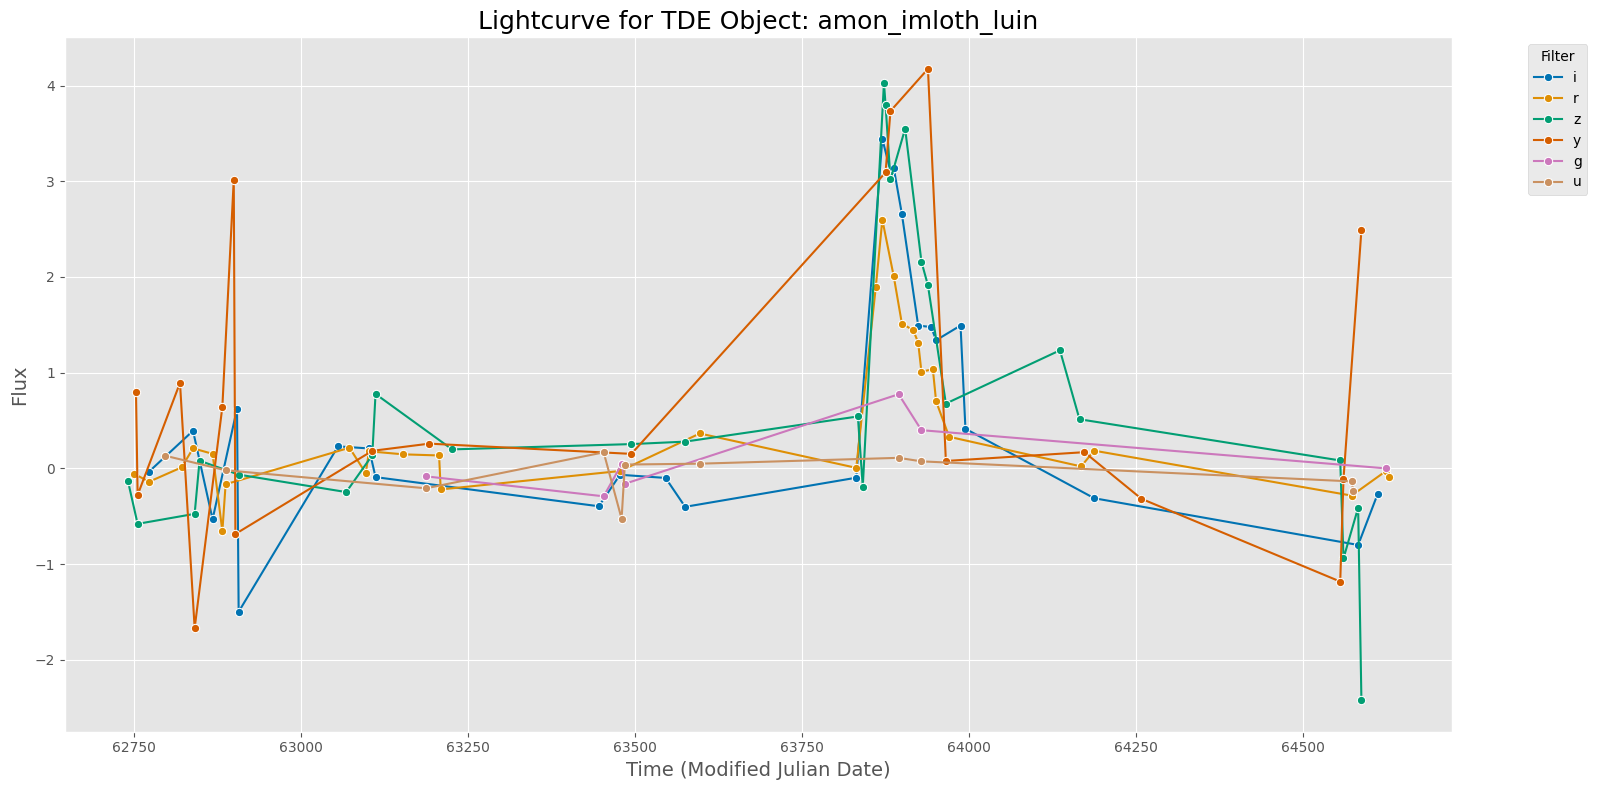

Lightcurve descriptive stats:
{'time_min': 62740.491, 'time_max': 64628.8057, 'flux_min': -2.42171096, 'flux_max': 4.17405661, 'flux_mean': 0.5254073463025211, 'flux_std': 1.2305203408037406, 'flux_median': 0.13738491}

summary
{"tde_object_id":"amon_imloth_luin","split":"split_01","time_bins":[62740.491,62839.876,62939.261,63038.646,63138.031,63237.416,63336.801,63436.186,63535.571,63634.956,63734.341,63833.726,63933.111,64032.496,64131.881,64231.266,64330.651,64430.036,64529.421,64628.806],"binned_flux":[0.102,-0.089,null,0.154,0.033,null,null,-0.074,0.038,null,0.15,2.09,1.239,null,0.302,-0.318,null,null,-0.303],"descriptive_stats":{"time_min":62740.491,"time_max":64628.8057,"flux_min":-2.42171096,"flux_max":4.17405661,"flux_mean":0.5254073463025211,"flux_std":1.2305203408037406,"flux_median":0.13738491}}


In [30]:
# 1. Select a TDE
tde_sample = train_log_df[train_log_df['target'] == 1].iloc[0]
tde_id = tde_sample['object_id']
tde_split = tde_sample['split']
print(f"\nPlotting a sample TDE: {tde_id} from {tde_split}")
tde_lc_df = load_lightcurve(tde_id, tde_split)
plot_lightcurve(tde_lc_df, f'Lightcurve for TDE Object: {tde_id}')

## --- Numerical Summary---

# Correct column names
time_col = 'Time (MJD)'
flux_col = 'Flux'

# Basic descriptive stats
lc_stats = {
    "time_min": float(tde_lc_df[time_col].min()),
    "time_max": float(tde_lc_df[time_col].max()),
    "flux_min": float(tde_lc_df[flux_col].min()),
    "flux_max": float(tde_lc_df[flux_col].max()),
    "flux_mean": float(tde_lc_df[flux_col].mean()),
    "flux_std": float(tde_lc_df[flux_col].std()),
    "flux_median": float(tde_lc_df[flux_col].median())
}

print("Lightcurve descriptive stats:")
print(lc_stats)

# 2 Binned flux over time (20 bins)
time_bins = np.linspace(tde_lc_df[time_col].min(), tde_lc_df[time_col].max(), 20)
binned_flux = []
for i in range(len(time_bins)-1):
    mask = (tde_lc_df[time_col] >= time_bins[i]) & (tde_lc_df[time_col] < time_bins[i+1])
    binned_flux.append(float(tde_lc_df.loc[mask, flux_col].mean()) if mask.any() else None)

# Round for readability
time_bins_list = [round(float(b), 3) for b in time_bins]
binned_flux = [round(f, 3) if f is not None else None for f in binned_flux]

lightcurve_summary = {
    "tde_object_id": tde_id,
    "split": tde_split,
    "time_bins": time_bins_list,
    "binned_flux": binned_flux,
    "descriptive_stats": lc_stats
}

print("\nsummary")
print(json.dumps(lightcurve_summary, separators=(',', ':')))


Plotting a sample Non-TDE (AGN): Dornhoth_fervain_onodrim from split_01


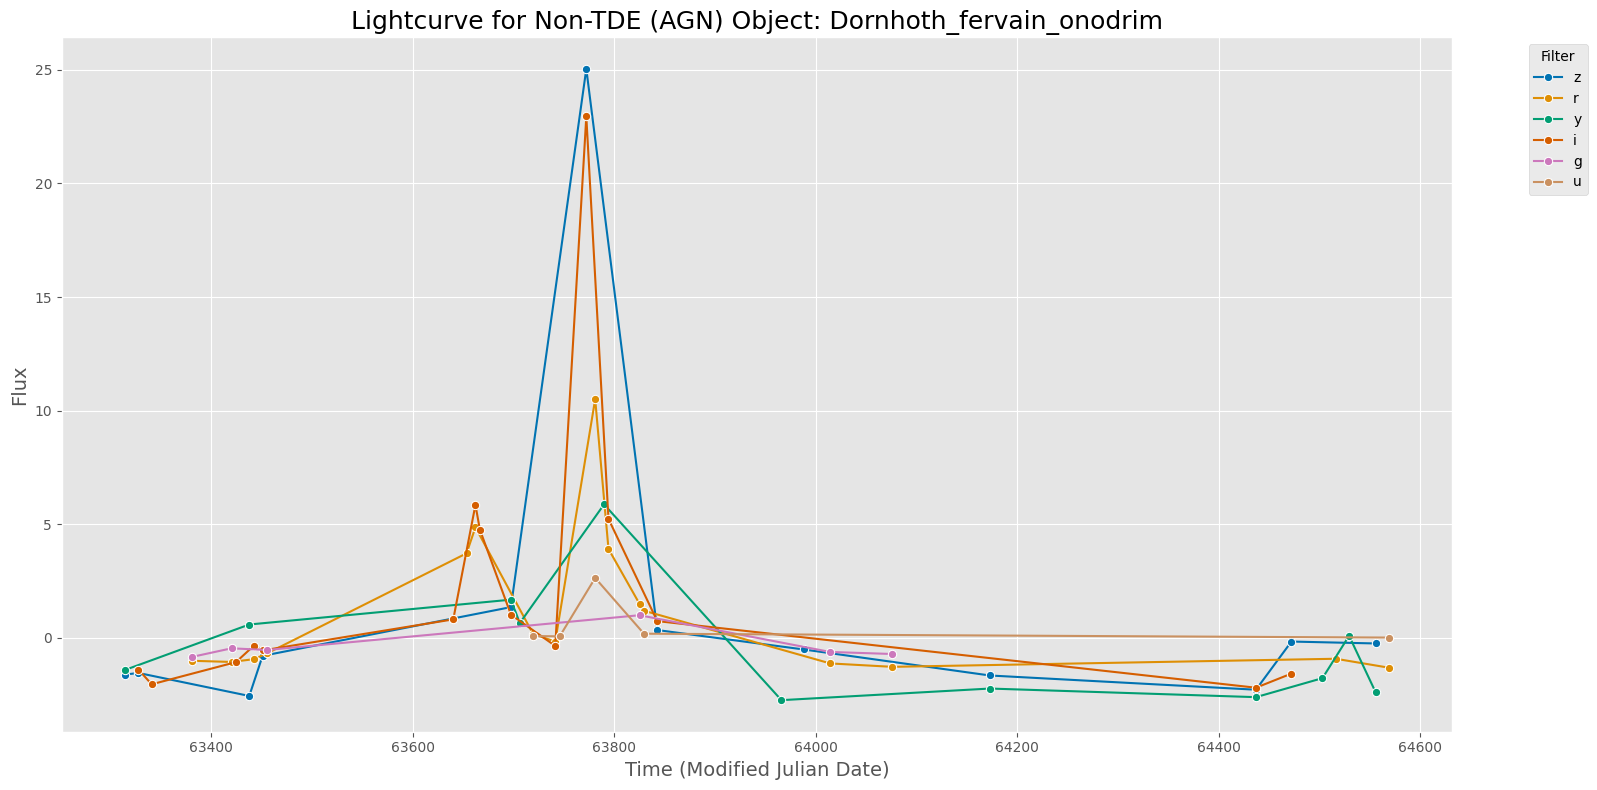

AGN lightcurve descriptive stats:
{'time_min': 63314.4662, 'time_max': 64568.7381, 'flux_min': -2.75628465, 'flux_max': 25.04734337, 'flux_mean': 0.9284827061538462, 'flux_std': 4.803444635408017, 'flux_median': -0.36783976}
summary
{"agn_object_id":"Dornhoth_fervain_onodrim","split":"split_01","time_bins":[63314.466,63380.481,63446.495,63512.509,63578.523,63644.538,63710.552,63776.566,63842.581,63908.595,63974.609,64040.624,64106.638,64172.652,64238.667,64304.681,64370.695,64436.709,64502.724,64568.738],"binned_flux":[-1.616,-0.868,-0.654,null,0.802,2.978,6.819,3.55,0.529,-2.756,-0.765,-1.006,null,-1.957,null,null,null,-1.778,-1.063],"descriptive_stats":{"time_min":63314.4662,"time_max":64568.7381,"flux_min":-2.75628465,"flux_max":25.04734337,"flux_mean":0.9284827061538462,"flux_std":4.803444635408017,"flux_median":-0.36783976}}


In [ ]:
# 2. Select a non-TDE (the most common type, AGN)
agn_sample = train_log_df[train_log_df['SpecType'] == 'AGN'].iloc[0]
agn_id = agn_sample['object_id']
agn_split = agn_sample['split']
print(f"\nPlotting a sample Non-TDE (AGN): {agn_id} from {agn_split}")
agn_lc_df = load_lightcurve(agn_id, agn_split)
plot_lightcurve(agn_lc_df, f'Lightcurve for Non-TDE (AGN) Object: {agn_id}')

# --- Numerical Summary ---
time_col = 'Time (MJD)'
flux_col = 'Flux'

# Basic descriptive stats
lc_stats = {
    "time_min": float(agn_lc_df[time_col].min()),
    "time_max": float(agn_lc_df[time_col].max()),
    "flux_min": float(agn_lc_df[flux_col].min()),
    "flux_max": float(agn_lc_df[flux_col].max()),
    "flux_mean": float(agn_lc_df[flux_col].mean()),
    "flux_std": float(agn_lc_df[flux_col].std()),
    "flux_median": float(agn_lc_df[flux_col].median())
}

print("AGN lightcurve descriptive stats:")
print(lc_stats)

# Binned flux over time (20 bins)
time_bins = np.linspace(agn_lc_df[time_col].min(), agn_lc_df[time_col].max(), 20)
binned_flux = []
for i in range(len(time_bins)-1):
    mask = (agn_lc_df[time_col] >= time_bins[i]) & (agn_lc_df[time_col] < time_bins[i+1])
    binned_flux.append(float(agn_lc_df.loc[mask, flux_col].mean()) if mask.any() else None)

# Round for readability
time_bins_list = [round(float(b), 3) for b in time_bins]
binned_flux = [round(f, 3) if f is not None else None for f in binned_flux]

agn_lightcurve_summary = {
    "agn_object_id": agn_id,
    "split": agn_split,
    "time_bins": time_bins_list,
    "binned_flux": binned_flux,
    "descriptive_stats": lc_stats
}

print("summary")
print(json.dumps(agn_lightcurve_summary, separators=(',', ':')))


* The TDE lightcurve shows a relatively gradual rise in brightness, peaking around a flux of 4, followed by a decline. The event seems to last for a significant period.

* The Non-TDE (AGN) lightcurve is dominated by a single, extremely sharp and intense flare, reaching a flux over 25. This is characteristic of the erratic variability is seen on Active Galactic Nuclei.

The AGN has a much higher maximum flux (`flux_max` 25.0 vs 4.2) and a much larger standard deviation (`flux_std` 4.8 vs 1.2), driven by that single massive flare.

I have confirmed that the information to distinguish these objects is encoded in the shape and characteristics of their lightcurves over time. However, the raw data is in a "long" format with a variable number of points for each object. I cannot feed this directly into most machine learning models (like LightGBM or XGBoost). So the next step is feature engineering.